In [1]:

import os
import zipfile

base_directory = '/content/base_directory'
os.makedirs(base_directory, exist_ok=True)

images_zip_path = '/content/drive/MyDrive/images_training_rev1.zip'
with zipfile.ZipFile(images_zip_path, 'r') as zip_ref:
    zip_ref.extractall(base_directory)

images_zip_path = '/content/drive/MyDrive/images_test_rev1.zip'
with zipfile.ZipFile(images_zip_path, 'r') as zip_ref:
    zip_ref.extractall(base_directory)

csv_zip_path = '/content/drive/MyDrive/training_solutions_rev1.zip'
with zipfile.ZipFile(csv_zip_path, 'r') as zip_ref:
    zip_ref.extractall(base_directory)


In [37]:
!pip install keras_preprocessing

In [4]:
%matplotlib inline
import pandas as pd
import os, random, shutil

from keras_preprocessing import image
import matplotlib.pyplot as plt

In [5]:
base_path = r'/content/base_directory'

In [6]:
training_solutions = os.path.join(base_path, 'training_solutions_rev1.csv')
training_images    = os.path.join(base_path, 'images_training_rev1')

In [7]:
df = pd.read_csv(training_solutions)

In [8]:
cols = df.columns
new = list(map(lambda s: s.replace('Class','Q'), cols))
df.columns = new

In [9]:
df.shape

(61578, 38)

In [10]:
df.head()

,GalaxyID,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q3.1,Q3.2,Q4.1,Q4.2,...,Q9.3,Q10.1,Q10.2,Q10.3,Q11.1,Q11.2,Q11.3,Q11.4,Q11.5,Q11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [11]:
ellipticals = df[(df['Q1.1']>0.8) & (df['Q7.1']>0.4)]['GalaxyID'].tolist()
lenticulars = df[(df['Q1.1']>0.8) & (df['Q7.2']>0.4)]['GalaxyID'].tolist()
spirals = df[(df['Q1.2']>0.8) & (df['Q2.1']>0.4)]['GalaxyID'].tolist()

In [12]:
print('Total number of elliptical examples: ',  len(ellipticals))
print('Total number of lenticular examples: ',  len(lenticulars))
print('Total number of spiral examples: ',  len(spirals))

Total number of elliptical examples:  4555
Total number of lenticular examples:  3861
Total number of spiral examples:  3078


Summary Statistics:
            GalaxyID          Q1.1          Q1.2          Q1.3          Q2.1  \
count   61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean   550179.708337      0.432526      0.542261      0.025213      0.106408   
std    258724.130197      0.283517      0.296429      0.037967      0.212505   
min    100008.000000      0.000000      0.000000      0.000000      0.000000   
25%    327874.250000      0.175812      0.280862      0.000000      0.000000   
50%    551933.000000      0.416994      0.558754      0.014870      0.000000   
75%    773232.000000      0.679182      0.811339      0.034325      0.085161   
max    999967.000000      1.000000      1.000000      0.935147      1.000000   

               Q2.2          Q3.1          Q3.2          Q4.1          Q4.2  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.435854      0.102526      0.333328      0.215629      0.220224   
std        0.301867   

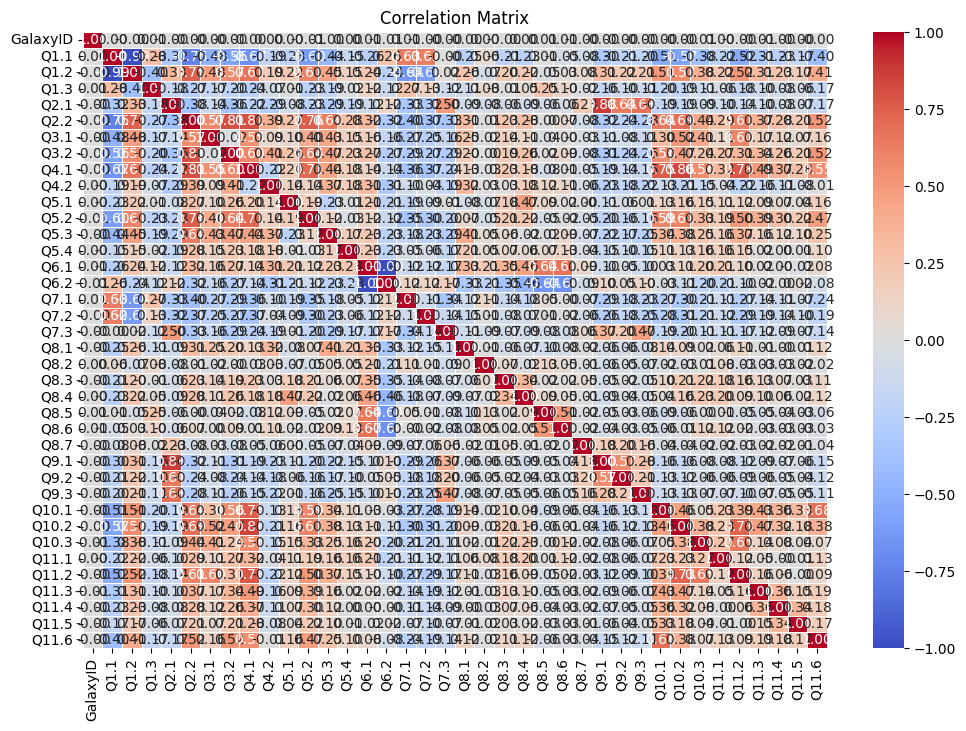

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example summary statistics
summary_statistics = df.describe()

# Example correlation matrix
correlation_matrix = df.corr()

# Visualization of summary statistics
print("Summary Statistics:")
print(summary_statistics)

# Visualization of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [13]:
def _proc_images(src, dst, label, arr, percent):
    train_dir = os.path.join(dst, 'train')
    val_dir = os.path.join(dst, 'validation')

    train_dest = os.path.join(train_dir, label)
    val_dest   = os.path.join(val_dir, label)

    if not os.path.exists(train_dest):
        os.makedirs(train_dest)

    if not os.path.exists(val_dest):
        os.makedirs(val_dest)

    random.shuffle(arr)

    idx = int(len(arr)*percent)
    for i in arr[0:idx]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(train_dest, str(i)+'.jpg'))
    for i in arr[idx:]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(val_dest, str(i)+'.jpg'))

    print(label, 'done!')

In [14]:
my_data = os.path.join(base_path, 'data')

In [15]:
_proc_images(training_images, my_data, 'elliptical', ellipticals, 0.7)
_proc_images(training_images, my_data, 'lenticular', lenticulars, 0.7)
_proc_images(training_images, my_data, 'spiral', spirals, 0.7)

elliptical done!
lenticular done!
spiral done!


In [16]:
print('Total train elliptical:', len(os.listdir(os.path.join(my_data, 'train', 'elliptical'))))
print('Total train lenticular:', len(os.listdir(os.path.join(my_data, 'train', 'lenticular'))))
print('Total train spiral:', len(os.listdir(os.path.join(my_data, 'train', 'spiral'))))

Total train elliptical: 3188
Total train lenticular: 2702
Total train spiral: 2154


In [17]:
print('Total validation elliptical:', len(os.listdir(os.path.join(my_data, 'validation', 'elliptical'))))
print('Total validation lenticular:', len(os.listdir(os.path.join(my_data, 'validation', 'lenticular'))))
print('Total validation spiral:', len(os.listdir(os.path.join(my_data, 'validation', 'spiral'))))

Total validation elliptical: 1367
Total validation lenticular: 1159
Total validation spiral: 924


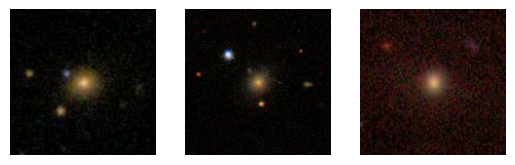

In [18]:
# elliptical class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'elliptical'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'elliptical', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

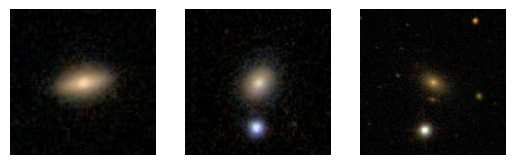

In [19]:
# lenticular class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'lenticular'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'lenticular', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

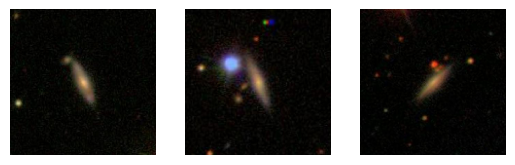

In [20]:
# spiral class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'spiral'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'spiral', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

In [34]:
pip install scikit-learn


In [45]:
# Flatten and scale images for PCA
# Function to load and preprocess images
from keras.preprocessing import image as keras_image

# Function to load and preprocess images
def load_and_preprocess_images(image_directory):
    img_data = []
    for filename in os.listdir(image_directory):
        img_path = os.path.join(image_directory, filename)
        img = keras_image.load_img(img_path, target_size=(150, 150))
        img_array = keras_image.img_to_array(img)
        img_flat = img_array.flatten()
        img_data.append(img_flat)
    return np.array(img_data)



train_elliptical_data = load_and_preprocess_images(os.path.join(my_data, 'train', 'elliptical'))
train_lenticular_data = load_and_preprocess_images(os.path.join(my_data, 'train', 'lenticular'))
train_spiral_data = load_and_preprocess_images(os.path.join(my_data, 'train', 'spiral'))

val_elliptical_data = load_and_preprocess_images(os.path.join(my_data, 'validation', 'elliptical'))
val_lenticular_data = load_and_preprocess_images(os.path.join(my_data, 'validation', 'lenticular'))
val_spiral_data = load_and_preprocess_images(os.path.join(my_data, 'validation', 'spiral'))

# Combine flattened data
X_train = np.concatenate([train_elliptical_data, train_lenticular_data, train_spiral_data], axis=0)
X_val = np.concatenate([val_elliptical_data, val_lenticular_data, val_spiral_data], axis=0)

# Apply PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

n_components = 100  # Choose the number of components you want to keep
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

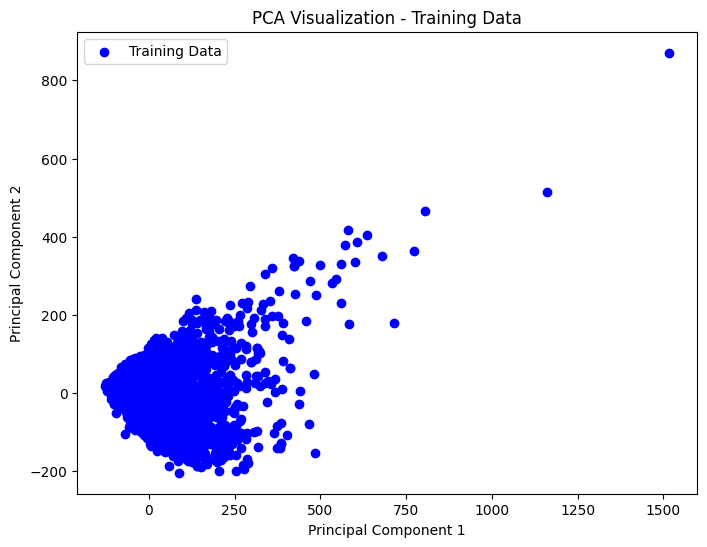

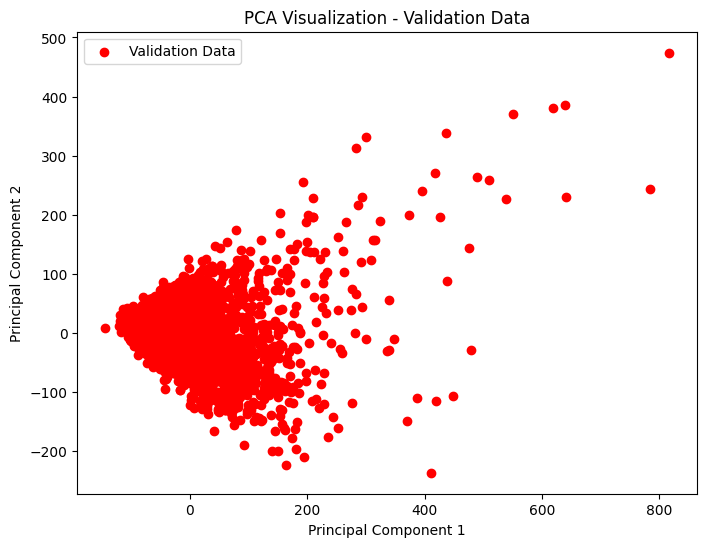

In [46]:
import matplotlib.pyplot as plt


# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='blue', label='Training Data')
plt.title('PCA Visualization - Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Scatter plot for validation data
plt.figure(figsize=(8, 6))
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c='red', label='Validation Data')
plt.title('PCA Visualization - Validation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [47]:
pip install plotly


In [49]:
import plotly.express as px


# Scatter plot for training data using Plotly
fig_train = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], title='PCA Visualization - Training Data', labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'}, color_discrete_sequence=['blue'])
fig_train.show()

# Scatter plot for validation data using Plotly
fig_val = px.scatter(x=X_val_pca[:, 0], y=X_val_pca[:, 1], title='PCA Visualization - Validation Data', labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'}, color_discrete_sequence=['red'])
fig_val.show()


Mean Pixel Intensity: [11.46556826  7.86083793  5.72562522]


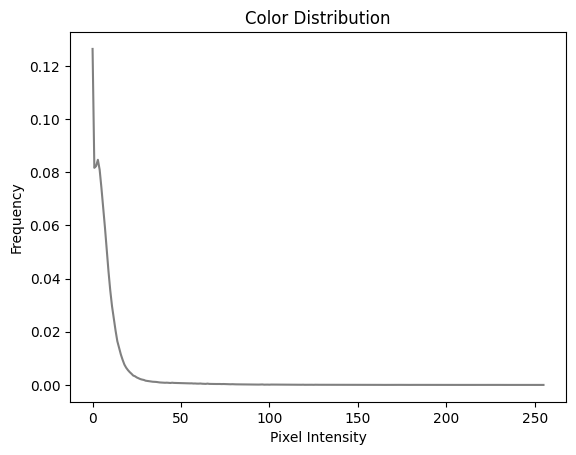

In [29]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_statistical_features(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load the image from {image_path}")
        return None, None

    # Convert BGR to RGB (OpenCV loads images in BGR format by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Flatten the image to a 1D array
    pixels = image_rgb.reshape((-1, 3))

    # Calculate mean pixel intensity
    mean_intensity = np.mean(pixels, axis=0)

    # Calculate color distribution (histogram)
    hist, bins = np.histogram(image_rgb, bins=256, range=[0, 256], density=True)

    return mean_intensity, hist

def plot_histogram(hist):
    plt.plot(hist, color='gray')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Color Distribution')
    plt.show()

# Example usage on a sample image from the lenticular class
sample_image_path = '/content/base_directory/data/train/lenticular/101291.jpg'  # Replace with an actual image path
mean_intensity, color_distribution = extract_statistical_features(sample_image_path)

if mean_intensity is not None and color_distribution is not None:
    print("Mean Pixel Intensity:", mean_intensity)
    plot_histogram(color_distribution)


Mean Pixel Intensity: [7.05477372 6.83209105 4.2524753 ]


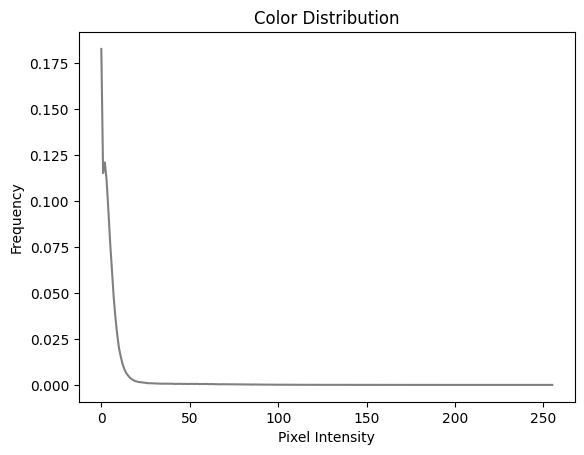

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_statistical_features(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load the image from {image_path}")
        return None, None

    # Convert BGR to RGB (OpenCV loads images in BGR format by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Flatten the image to a 1D array
    pixels = image_rgb.reshape((-1, 3))

    # Calculate mean pixel intensity
    mean_intensity = np.mean(pixels, axis=0)

    # Calculate color distribution (histogram)
    hist, bins = np.histogram(image_rgb, bins=256, range=[0, 256], density=True)

    return mean_intensity, hist

def plot_histogram(hist):
    plt.plot(hist, color='gray')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Color Distribution')
    plt.show()

# Example usage on a sample image from the spiral class
sample_image_path = '/content/base_directory/data/train/spiral/100520.jpg'  # Replace with an actual image path
mean_intensity, color_distribution = extract_statistical_features(sample_image_path)

if mean_intensity is not None and color_distribution is not None:
    print("Mean Pixel Intensity:", mean_intensity)
    plot_histogram(color_distribution)


Mean Pixel Intensity: [10.73044789  8.87888261  6.01398407]


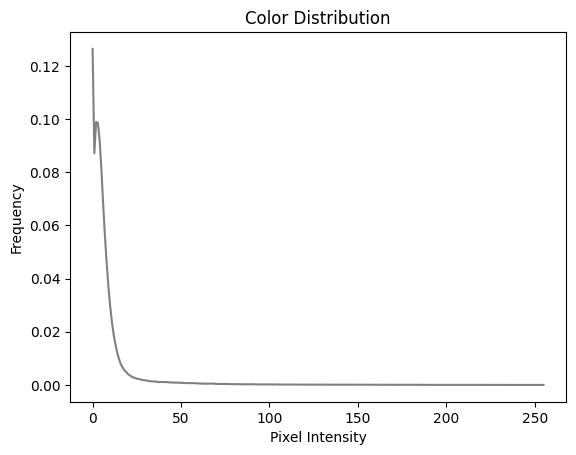

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_statistical_features(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load the image from {image_path}")
        return None, None

    # Convert BGR to RGB (OpenCV loads images in BGR format by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Flatten the image to a 1D array
    pixels = image_rgb.reshape((-1, 3))

    # Calculate mean pixel intensity
    mean_intensity = np.mean(pixels, axis=0)

    # Calculate color distribution (histogram)
    hist, bins = np.histogram(image_rgb, bins=256, range=[0, 256], density=True)

    return mean_intensity, hist

def plot_histogram(hist):
    plt.plot(hist, color='gray')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Color Distribution')
    plt.show()

# Example usage on a sample image from the elliptical class
sample_image_path = '/content/base_directory/data/train/elliptical/100672.jpg'  # Replace with an actual image path
mean_intensity, color_distribution = extract_statistical_features(sample_image_path)

if mean_intensity is not None and color_distribution is not None:
    print("Mean Pixel Intensity:", mean_intensity)
    plot_histogram(color_distribution)


In [ ]:
print('The final dataset is available at:', my_data)

The final dataset is available at: /content/base_directory/data


In [ ]:
import os, random, shutil
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:

print(tf.__version__)  # check tensorflow version

2.14.0


In [ ]:

train_dir = '/content/base_directory/data/train'
validation_dir = '/content/base_directory/data/validation'

In [ ]:
total_train = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_train += len(os.listdir(os.path.join(train_dir, c)))
print('Total train:', total_train)

total_validation = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_validation += len(os.listdir(os.path.join(validation_dir, c)))
print('Total validation:', total_validation)

Total train: 8044
Total validation: 3450


In [ ]:
BS = 32


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=25,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2)
validation_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=BS,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         batch_size=BS,
                                                         shuffle=False,
                                                         class_mode='categorical')


Found 8044 images belonging to 3 classes.
Found 3450 images belonging to 3 classes.


In [ ]:

model = tf.keras.models.Sequential([
    # first convolution layer, input is an 150x150 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
model.summary()  # inspect model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

EPOCHS = 100



In [ ]:
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    verbose=1)

Epoch 1/100
252/252 [==============================] - 115s 375ms/step - loss: 0.7886 - accuracy: 0.5766 - val_loss: 0.6508 - val_accuracy: 0.6400
Epoch 2/100
252/252 [==============================] - 89s 355ms/step - loss: 0.6263 - accuracy: 0.6653 - val_loss: 0.7507 - val_accuracy: 0.5933
Epoch 3/100
252/252 [==============================] - 97s 386ms/step - loss: 0.5734 - accuracy: 0.6983 - val_loss: 0.5579 - val_accuracy: 0.7107
Epoch 4/100
252/252 [==============================] - 105s 418ms/step - loss: 0.5297 - accuracy: 0.7268 - val_loss: 0.4844 - val_accuracy: 0.7522
Epoch 5/100
252/252 [==============================] - 97s 386ms/step - loss: 0.5339 - accuracy: 0.7224 - val_loss: 0.4814 - val_accuracy: 0.7545
Epoch 6/100
252/252 [==============================] - 89s 355ms/step - loss: 0.4921 - accuracy: 0.7534 - val_loss: 0.4662 - val_accuracy: 0.7794
Epoch 7/100
252/252 [==============================] - 98s 390ms/step - loss: 0.4793 - accuracy: 0.7599 - val_loss: 0.5189

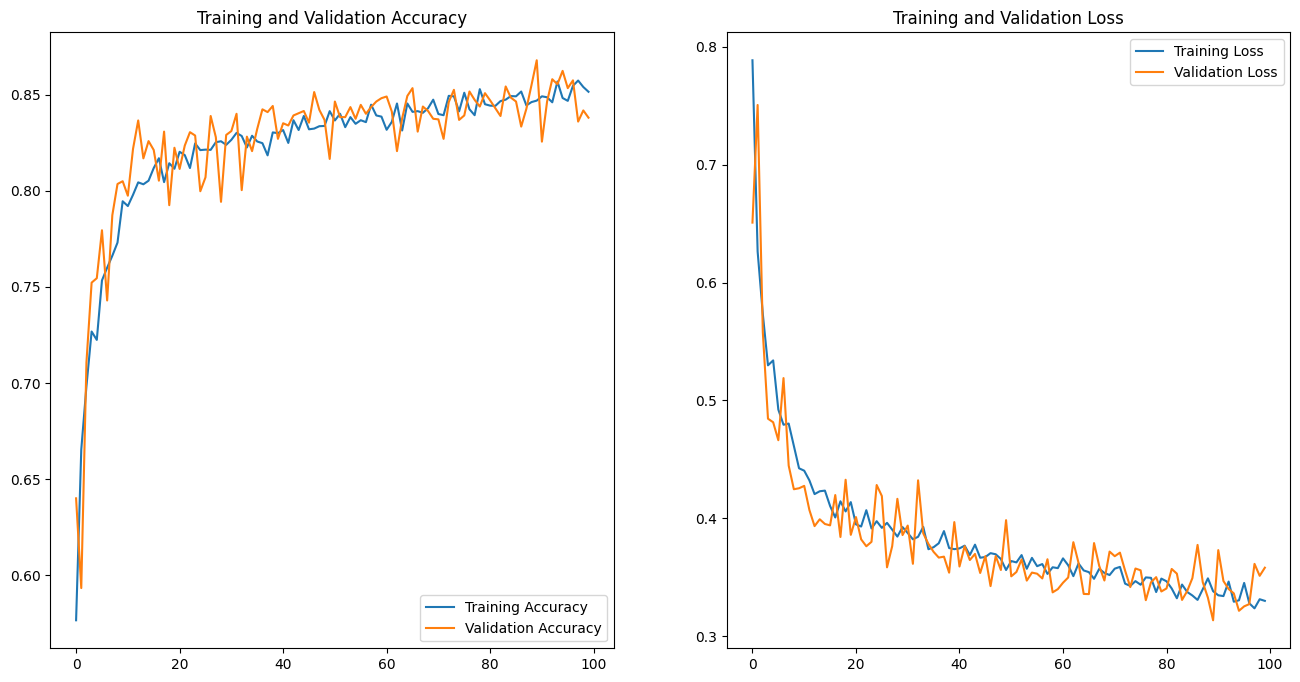

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Get true labels and predictions for the validation set
Y_true = []
Y_pred = []

for i in range(len(validation_generator)):
    x, y = validation_generator[i]
    Y_true.extend(np.argmax(y, axis=1))
    Y_pred.extend(np.argmax(model.predict(x), axis=1))

# Calculate confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate classification report
class_report = classification_report(Y_true, Y_pred)

# Print classification report
print("\nClassification Report:")
print(class_report)

# Calculate accuracy
accuracy = accuracy_score(Y_true, Y_pred)

# Print accuracy
print("\nAccuracy:", accuracy)


1/1 [==============================] - 0s 92ms/step
Confusion Matrix:
[[1108  258    1]
 [ 236  907   16]
 [   1   23  900]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1367
           1       0.76      0.78      0.77      1159
           2       0.98      0.97      0.98       924

    accuracy                           0.84      3450
   macro avg       0.86      0.86      0.86      3450
weighted avg       0.85      0.84      0.85      3450


Accuracy: 0.8449275362318841


In [ ]:
import numpy as np

# Make predictions
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)


108/108 [==============================] - 41s 383ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[1105  262    0]
 [ 232  904   23]
 [   1   26  897]]

Classification Report:
              precision    recall  f1-score   support

  elliptical       0.83      0.81      0.82      1367
  lenticular       0.76      0.78      0.77      1159
      spiral       0.97      0.97      0.97       924

    accuracy                           0.84      3450
   macro avg       0.85      0.85      0.85      3450
weighted avg       0.84      0.84      0.84      3450



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.8431
Recall: 0.8423
F1 Score: 0.8426


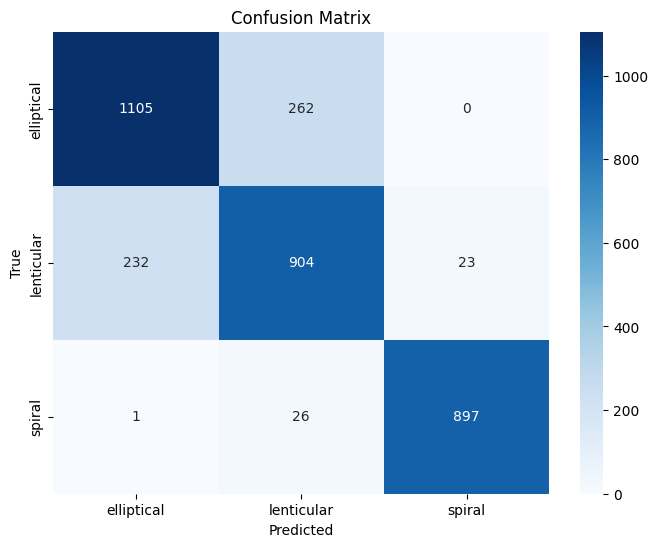

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 142ms/step


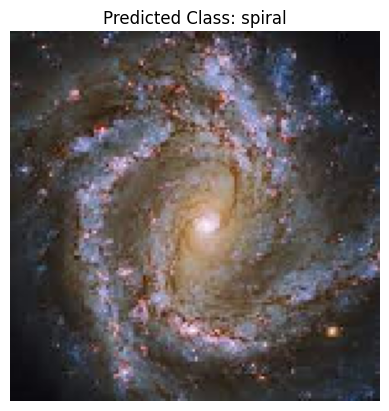

Accuracy on the given image: 100.00%


In [6]:
from keras_preprocessing import image as keras_image
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('/content/FInale Galaxy Classification model capstone.h5')

# Define the classes
classes = ['elliptical', 'lenticular', 'spiral']

true_class = 'spiral'

# Path to the image you want to predict
image_path = '/content/SP.jpg'

# Load and preprocess the image
img = keras_image.load_img(image_path, target_size=(150, 150))
img_array = keras_image.img_to_array(img)
img_array /= 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class = classes[np.argmax(prediction)]

# Display the image and predicted class
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()
# Check if the prediction is correct
is_correct = (true_class == predicted_class)
print(f'Accuracy on the given image: {is_correct * 100:.2f}%')

